Import all necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

loading both data set.training and testing data set

In [3]:
ds_train=pd.read_excel("Final_Train.xlsx")
ds_test=pd.read_excel('Final_Test.xlsx')

In [4]:
ds_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [5]:
ds_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [6]:
ds_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [7]:
ds_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


# Checking data types

In [8]:
ds_train.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In training data set input features are object type and target variable is int64 type

In [9]:
ds_test.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object

test data set have input variables of object type

In [10]:
ds_train.shape

(5961, 7)

train data set have 5961rows and 7 columns

In [11]:
ds_test.shape

(1987, 6)

test data set ave 1987 rows and 6 columns

In [12]:
ds_train.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

training data have missing values

In [13]:
ds_test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

testing data have missing values

In [14]:
ds_train.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


# Visulazastion of training and testing data

lets get all the values of indivisual column

In [15]:

print(ds_train['Qualification'].value_counts())
pd.set_option('display.max_rows',None)

BDS                                                                          488
BHMS                                                                         477
BAMS                                                                         471
MBBS                                                                         334
MBBS, MS - ENT                                                               220
                                                                            ... 
Fellowship in Aesthetic Medicine, MBBS, DDVL                                   1
BAMS, Fellowship in Cardiac Rehabilitation                                     1
MD - Acupuncture, PhD- Ayurveda, BEMS, MBBS                                    1
MBBS, Diploma in Dermatology, MD - Microbiology                                1
MBBS, Diploma in Otorhinolaryngology (DLO), MCh - Burns & Plastic Surgery      1
Name: Qualification, Length: 1420, dtype: int64


In [16]:
print(ds_test['Qualification'].value_counts())
pd.set_option('display.max_rows',None)

BAMS                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        153
BHMS                                                                                                                                                                                                                                                                                                                                                                                                    

In [17]:

print(ds_train['Experience'].value_counts())
pd.set_option('display.max_rows',None)

9 years experience     323
10 years experience    294
11 years experience    288
8 years experience     282
12 years experience    279
19 years experience    251
14 years experience    251
13 years experience    242
7 years experience     240
6 years experience     218
15 years experience    200
5 years experience     188
16 years experience    186
18 years experience    184
17 years experience    179
20 years experience    156
21 years experience    154
22 years experience    147
23 years experience    119
4 years experience     115
3 years experience     111
24 years experience     97
0 years experience      87
27 years experience     84
25 years experience     82
28 years experience     82
26 years experience     71
2 years experience      69
30 years experience     68
29 years experience     67
34 years experience     67
32 years experience     65
33 years experience     62
38 years experience     61
39 years experience     57
31 years experience     55
37 years experience     55
3

In [18]:
print(ds_test['Experience'].value_counts())
pd.set_option('display.max_rows',None)

10 years experience    110
8 years experience      98
9 years experience      96
19 years experience     92
7 years experience      89
11 years experience     86
13 years experience     83
14 years experience     81
12 years experience     79
17 years experience     72
18 years experience     70
6 years experience      62
15 years experience     57
16 years experience     51
5 years experience      50
23 years experience     49
20 years experience     48
21 years experience     48
29 years experience     46
4 years experience      44
22 years experience     37
24 years experience     34
3 years experience      33
25 years experience     33
26 years experience     32
0 years experience      31
28 years experience     29
27 years experience     27
36 years experience     27
34 years experience     27
31 years experience     26
38 years experience     23
30 years experience     18
44 years experience     16
32 years experience     16
40 years experience     15
37 years experience     14
3

In [19]:
print(ds_train['Place'].value_counts())

HSR Layout, Bangalore                     75
Andheri West, Mumbai                      70
Dwarka, Delhi                             67
Banjara Hills, Hyderabad                  64
Mulund West, Mumbai                       54
Borivali West, Mumbai                     52
Kandivali West, Mumbai                    50
Indiranagar, Bangalore                    48
Whitefield, Bangalore                     47
Malad West, Mumbai                        47
Malleswaram, Bangalore                    47
Pitampura, Delhi                          45
Vileparle West, Mumbai                    43
Andheri East, Mumbai                      43
Powai, Mumbai                             42
Jubilee Hills, Hyderabad                  40
Marathahalli, Bangalore                   39
Bannerghatta Road, Bangalore              39
Kondapur, Hyderabad                       38
Bandra West, Mumbai                       38
Ghatkopar East, Mumbai                    38
Rohini, Delhi                             37
Secunderab

In [20]:
print(ds_test['Place'].value_counts())

Andheri West, Mumbai                  27
Mulund West, Mumbai                   27
Dwarka, Delhi                         26
Whitefield, Bangalore                 23
HSR Layout, Bangalore                 22
Banjara Hills, Hyderabad              21
Rohini, Delhi                         19
Bannerghatta Road, Bangalore          18
Shalimar Bagh, Delhi                  17
Borivali West, Mumbai                 16
Pitampura, Delhi                      16
Adyar, Chennai                        16
Jubilee Hills, Hyderabad              16
KPHB, Hyderabad                       15
Indiranagar, Bangalore                14
Mylapore, Chennai                     14
Mira Road, Mumbai                     14
Malleswaram, Bangalore                14
Vijayanagar, Bangalore                14
Velachery, Chennai                    14
Madhapur, Hyderabad                   14
Vileparle West, Mumbai                14
Malad West, Mumbai                    13
Chembur, Mumbai                       12
Kondapur, Hydera

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64


<AxesSubplot:xlabel='Profile', ylabel='count'>

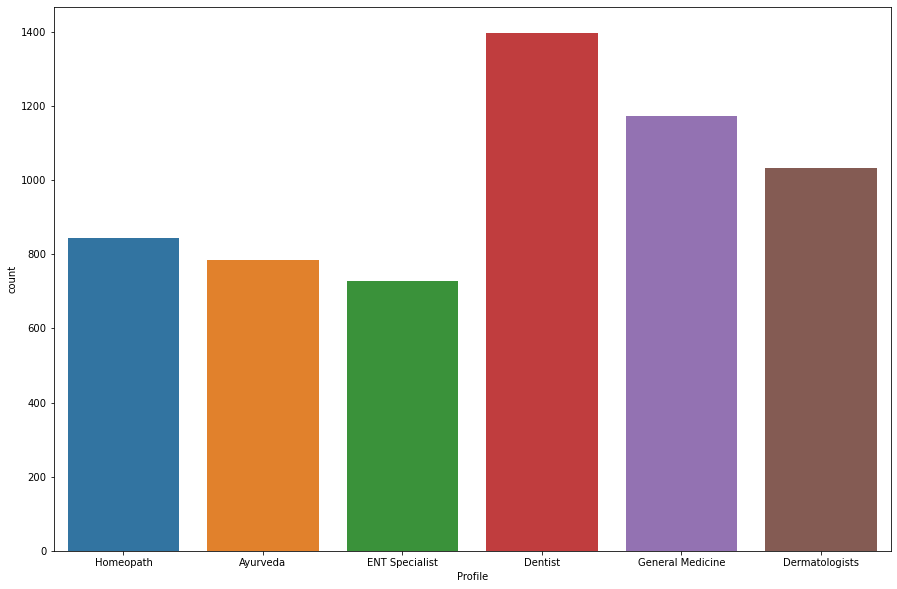

In [21]:
print(ds_train['Profile'].value_counts())
plt.figure(figsize=(15,10))
sns.countplot(ds_train['Profile'])

General Medicine    444
Dentist             441
Dermatologists      339
Homeopath           277
Ayurveda            251
ENT Specialist      235
Name: Profile, dtype: int64


<AxesSubplot:xlabel='Profile', ylabel='count'>

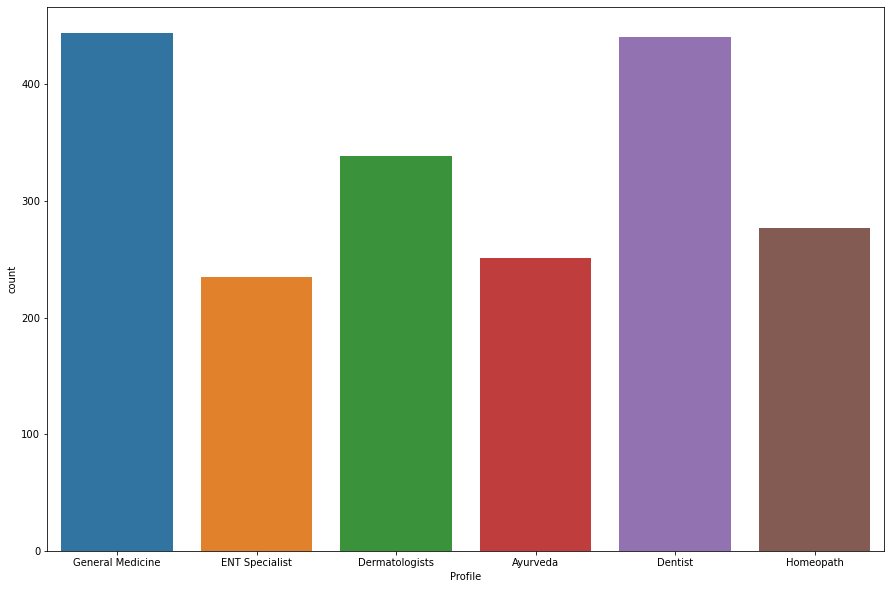

In [22]:
print(ds_test['Profile'].value_counts())
plt.figure(figsize=(15,10))
sns.countplot(ds_test['Profile'])

In [23]:

print(ds_train['Miscellaneous_Info'].value_counts())

Acrylic Partial Denture Crowns and Bridges Fixing Artificial Teeth                                                                               40
Tooth Extraction Dental Fillings Scaling / Polishing                                                                                             12
Dental Fillings Zirconia Crowns Dental Implant Fixing                                                                                            12
Skin Allergy Treatment Skin Allergies Dermabrasion                                                                                                9
Skin Disease Treatment Kidney Stone Treatment Gall Bladder (Biliary) Stone Treatment                                                              9
Cosmetic/ Aesthetic Dentistry Crowns and Bridges Fixing Complete/Partial Dentures Fixing                                                          8
Dermabrasion Laser Resurfacing Acne / Pimples Treatment                                                         

In [24]:
print(ds_test['Miscellaneous_Info'].value_counts())

Acrylic Partial Denture Crowns and Bridges Fixing Artificial Teeth                                                                                10
Skin Allergy Treatment Skin Allergies Dermabrasion                                                                                                 9
Dermabrasion Laser Resurfacing Acne / Pimples Treatment                                                                                            6
Balance Exercises Acne / Pimples Treatment Insulin Treatment                                                                                       4
Crowns and Bridges Fixing Complete/Partial Dentures Fixing Tooth Extraction                                                                        4
Tooth Extraction Dental Fillings Scaling / Polishing                                                                                               4
Laser Hair Removal Skin Allergy Treatment Skin Allergies                                                  

split the 'qualification' column as it has multiple values

In [25]:
ds_train['Qualification']=ds_train['Qualification'].str.split(',', expand=True)
ds_test['Qualification']=ds_test['Qualification'].str.split(',', expand=True)

In [26]:
ds_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,BHMS,24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,BAMS,12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,MBBS,9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,BSc - Zoology,12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


split the 'place' columns as it has more than one value

In [27]:
place=ds_train['Place'].str.split(',', expand=True)


divide the 'place' column into two parts. that are place1 and place2

In [28]:
ds_train['Place1']=place[1]

In [29]:
ds_train['place2']=place[0]

In [30]:
ds_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Place1,place2
0,BHMS,24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,Kakkanad
1,BAMS,12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,Whitefield
2,MBBS,9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Bangalore,Mathikere - BEL
3,BSc - Zoology,12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore,Bannerghatta Road
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai,Keelkattalai


In [31]:
ds_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,MBBS,31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,MBBS,40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,BDS,16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [32]:
place=ds_test['Place'].str.split(',', expand=True)


In [33]:
ds_test['place1']=place[1]

In [34]:
ds_test['place2']=place[0]

In [35]:
ds_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,place1,place2
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN,Mumbai,Ghatkopar East
1,MBBS,31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN,Hyderabad,West Marredpally
2,MBBS,40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",Chennai,KK Nagar
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN,Delhi,New Ashok Nagar
4,BDS,16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,Bangalore,Kanakpura Road


In [36]:
ds_train.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
Place1                  26
place2                  25
dtype: int64

In [37]:
ds_test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
place1                   6
place2                   6
dtype: int64

processing on 'Experience'  column,as it has to be int so convert it into int data type

In [38]:
ds_train["Experience"]=ds_train["Experience"].str.strip(" years experience")

In [39]:
ds_train["Experience"]=ds_train["Experience"].astype(int)

In [40]:
ds_test["Experience"]=ds_test["Experience"].str.strip(" years experience")

In [41]:
ds_test["Experience"]=ds_test["Experience"].astype(int)

filling missing values

In [42]:
ds_train['Place1']=ds_train['Place1'].fillna(ds_train['Place1'].mode()[0])
ds_train['place2']=ds_train['place2'].fillna(ds_train['place2'].mode()[0])


In [43]:
ds_test['place1']=ds_test['place1'].fillna(ds_test['place1'].mode()[0])
ds_test['place2']=ds_test['place2'].fillna(ds_test['place2'].mode()[0])


processing on rating column

In [44]:
ds_train['Rating']=ds_train["Rating"].str.replace("%",'')

In [45]:
ds_test['Rating']=ds_test["Rating"].str.replace("%",'')

In [46]:
ds_train['Rating']=ds_train['Rating'].astype(float)

In [47]:
ds_train['Rating']=ds_train['Rating'].fillna(0)

In [48]:
ds_test['Rating']=ds_test['Rating'].astype(float)
ds_test['Rating']=ds_test['Rating'].fillna(0)

processing on 'Miscellaneous_Info' column, as it contains how many people gave feedback to that doctor, so let's create separate column,and convert it into int type,and filled missing values

In [49]:

ds_train['Reviewers'] = ds_train['Miscellaneous_Info'].str.split('% ').str[1].str.split(' ').str[0]
ds_train['Reviewers'] = ds_train['Reviewers'].fillna(0)
ds_train['Rev_Len'] = ds_train['Reviewers'].str.len()
ds_train.loc[ds_train['Rev_Len']>3, 'Reviewers'] = 0
ds_train.loc[ds_train['Reviewers']==',', 'Reviewers'] = 0
ds_train['Reviewers'] = ds_train['Reviewers'].astype(int)
ds_train['Reviewers'].head()

0    16
1    76
2     0
3     0
4     4
Name: Reviewers, dtype: int32

In [50]:
ds_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Place1,place2,Reviewers,Rev_Len
0,BHMS,24,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,Kakkanad,16,2.0
1,BAMS,12,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,Whitefield,76,2.0
2,MBBS,9,0.0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Bangalore,Mathikere - BEL,0,NaN
3,BSc - Zoology,12,0.0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore,Bannerghatta Road,0,NaN
4,BAMS,20,100.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai,Keelkattalai,4,1.0


In [51]:
ds_test['Reviewers'] = ds_test['Miscellaneous_Info'].str.split('% ').str[1].str.split(' ').str[0]
ds_test['Reviewers'] = ds_test['Reviewers'].fillna(0)
ds_test['Rev_Len'] = ds_test['Reviewers'].str.len()
ds_test.loc[ds_test['Rev_Len']>3, 'Reviewers'] = 0
ds_test.loc[ds_test['Reviewers']==',', 'Reviewers'] = 0

ds_test['Reviewers'] = ds_test['Reviewers'].astype(int)

ds_test['Reviewers'].head()

0    0
1    0
2    4
3    0
4    0
Name: Reviewers, dtype: int32

In [52]:
ds_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,place1,place2,Reviewers,Rev_Len
0,MBBS,35,0.0,"Ghatkopar East, Mumbai",General Medicine,NaN,Mumbai,Ghatkopar East,0,NaN
1,MBBS,31,0.0,"West Marredpally, Hyderabad",ENT Specialist,NaN,Hyderabad,West Marredpally,0,NaN
2,MBBS,40,70.0,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",Chennai,KK Nagar,4,1.0
3,BAMS,0,0.0,"New Ashok Nagar, Delhi",Ayurveda,NaN,Delhi,New Ashok Nagar,0,NaN
4,BDS,16,100.0,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,Bangalore,Kanakpura Road,0,NaN


drooped unnecessary columns

In [53]:
ds_test.drop(['Rev_Len'],inplace=True,axis=1)

In [54]:
ds_train.drop(['Miscellaneous_Info','Rev_Len'],axis=1,inplace=True)

In [55]:
ds_test.drop("Miscellaneous_Info",axis=1,inplace=True)

In [56]:
ds_train.drop('Place',axis=1,inplace=True)

In [57]:
ds_test.drop('Place',axis=1,inplace=True)

Encode categorical data intp numerical data

In [58]:
from sklearn.preprocessing import LabelEncoder

In [59]:
le=LabelEncoder()

In [60]:
ds_train['Profile']=le.fit_transform(ds_train['Profile'])

In [61]:
ds_test['Profile']=le.fit_transform(ds_test['Profile'])

In [62]:
ds_train['Qualification']=le.fit_transform(ds_train['Qualification'])
ds_test['Qualification']=le.fit_transform(ds_test['Qualification'])

In [63]:
ds_train['Place1']=le.fit_transform(ds_train['Place1'])
ds_train['place2']=le.fit_transform(ds_train['place2'])

ds_test['place1']=le.fit_transform(ds_test['place1'])
ds_test['place2']=le.fit_transform(ds_test['place2'])

In [64]:
ds_test.head().isnull().sum()

Qualification    0
Experience       0
Rating           0
Profile          0
place1           0
place2           0
Reviewers        0
dtype: int64

In [65]:
ds_train.skew()

Qualification    0.068299
Experience       0.991089
Rating           0.247186
Profile          0.108803
Fees             0.751870
Place1           0.052844
place2           0.121186
Reviewers        9.113752
dtype: float64

In [66]:
ds_test.skew()

Qualification    0.013098
Experience       0.963447
Rating           0.225321
Profile          0.028926
place1           0.000822
place2           0.041189
Reviewers        6.620592
dtype: float64

after encoding lets check correlation between target variable and input features

In [67]:
ds_train.corr()

,Qualification,Experience,Rating,Profile,Fees,Place1,place2,Reviewers
Qualification,1.000000,0.201556,-0.007733,0.307982,0.233285,-0.033396,0.000053,0.078862
Experience,0.201556,1.000000,-0.038569,0.202073,0.002117,0.037547,0.015970,0.018701
Rating,-0.007733,-0.038569,1.000000,-0.126389,0.153273,-0.092319,-0.036624,0.278869
Profile,0.307982,0.202073,-0.126389,1.000000,0.145226,-0.013189,0.019533,0.012679
Fees,0.233285,0.002117,0.153273,0.145226,1.000000,-0.024606,-0.052750,0.089227
Place1,-0.033396,0.037547,-0.092319,-0.013189,-0.024606,1.000000,-0.082462,-0.064513
place2,0.000053,0.015970,-0.036624,0.019533,-0.052750,-0.082462,1.000000,-0.019407
Reviewers,0.078862,0.018701,0.278869,0.012679,0.089227,-0.064513,-0.019407,1.000000


<AxesSubplot:>

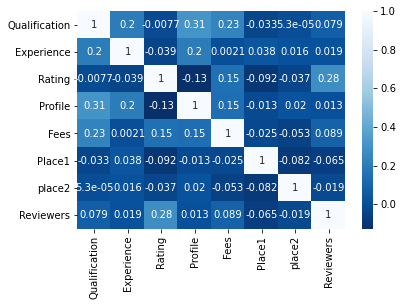

In [68]:
sns.heatmap(ds_train.corr(),annot=True,cmap='Blues_r')

above heatmap shows the correlation between target variable and input features

In [69]:
ds_test.corr()

,Qualification,Experience,Rating,Profile,place1,place2,Reviewers
Qualification,1.000000,0.197820,0.013873,0.305932,-0.048443,0.007444,0.106124
Experience,0.197820,1.000000,-0.019059,0.154077,0.008606,0.041298,-0.005017
Rating,0.013873,-0.019059,1.000000,-0.134298,-0.035756,-0.042595,0.311999
Profile,0.305932,0.154077,-0.134298,1.000000,0.032666,-0.002698,-0.008547
place1,-0.048443,0.008606,-0.035756,0.032666,1.000000,-0.094734,-0.050595
place2,0.007444,0.041298,-0.042595,-0.002698,-0.094734,1.000000,-0.024925
Reviewers,0.106124,-0.005017,0.311999,-0.008547,-0.050595,-0.024925,1.000000


<AxesSubplot:>

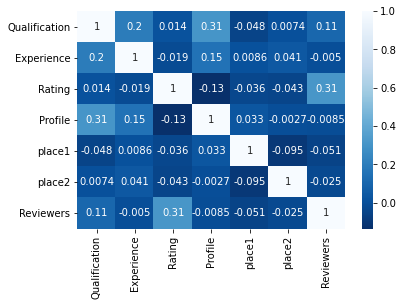

In [70]:
sns.heatmap(ds_test.corr(),annot=True,cmap='Blues_r')

above heatmap shws the corelation between different input features of test data

# Stastical summary of training data

In [71]:
ds_train.describe()

,Qualification,Experience,Rating,Profile,Fees,Place1,place2,Reviewers
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,47.962087,17.303976,42.217245,2.441872,307.944640,3.059722,410.120282,9.677906
std,39.371696,11.142798,47.340934,1.658014,190.920373,2.327136,255.174855,39.358833
min,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,6.000000,9.000000,0.000000,1.000000,150.000000,1.000000,195.000000,0.000000
50%,79.000000,14.000000,0.000000,2.000000,300.000000,3.000000,404.000000,0.000000
75%,79.000000,23.000000,96.000000,4.000000,500.000000,5.000000,622.000000,1.000000
max,150.000000,66.000000,100.000000,5.000000,950.000000,8.000000,865.000000,854.000000


# Stastical summary of training data

In [72]:
ds_test.describe()

,Qualification,Experience,Rating,Profile,place1,place2,Reviewers
count,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000
mean,29.154001,17.874685,42.634122,2.508807,3.013588,288.216910,11.506794
std,24.729848,11.366764,47.284014,1.654223,2.266778,173.420859,41.465978
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,0.000000,1.000000,1.000000,137.000000,0.000000
50%,48.000000,15.000000,0.000000,2.000000,3.000000,289.000000,0.000000
75%,48.000000,24.000000,96.000000,4.000000,5.000000,438.000000,3.000000
max,86.000000,65.000000,100.000000,5.000000,7.000000,588.000000,591.000000


Qualification       AxesSubplot(0.125,0.536818;0.168478x0.343182)
Experience       AxesSubplot(0.327174,0.536818;0.168478x0.343182)
Rating           AxesSubplot(0.529348,0.536818;0.168478x0.343182)
Profile          AxesSubplot(0.731522,0.536818;0.168478x0.343182)
Fees                   AxesSubplot(0.125,0.125;0.168478x0.343182)
Place1              AxesSubplot(0.327174,0.125;0.168478x0.343182)
place2              AxesSubplot(0.529348,0.125;0.168478x0.343182)
Reviewers           AxesSubplot(0.731522,0.125;0.168478x0.343182)
dtype: object

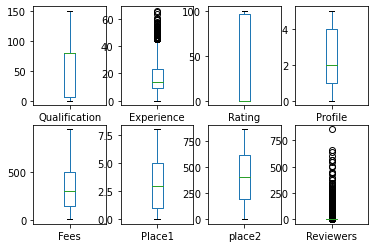

In [73]:
ds_train.plot(kind='box',subplots=True,layout=(2,4))

above boxplot of traing data shows that only two columns have outliers

Qualification       AxesSubplot(0.125,0.536818;0.168478x0.343182)
Experience       AxesSubplot(0.327174,0.536818;0.168478x0.343182)
Rating           AxesSubplot(0.529348,0.536818;0.168478x0.343182)
Profile          AxesSubplot(0.731522,0.536818;0.168478x0.343182)
place1                 AxesSubplot(0.125,0.125;0.168478x0.343182)
place2              AxesSubplot(0.327174,0.125;0.168478x0.343182)
Reviewers           AxesSubplot(0.529348,0.125;0.168478x0.343182)
dtype: object

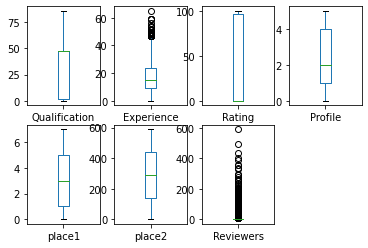

In [74]:
ds_test.plot(kind='box',subplots=True,layout=(2,4))

above boxplot of testing data shows that only two columns have outliers

divide data into input features and target variable

In [75]:
x=ds_train.drop(['Fees'],axis=1)

In [76]:
y=ds_train['Fees']

standardlized data using standardscaler

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
st=StandardScaler()

In [79]:
x1=st.fit_transform(x)

import regression algorithmns

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_squared_log_error

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=.25,random_state=100)
print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",x_test.shape)

x_train shape (4470, 7)
x_test shape (1491, 7)
y_train shape (4470,)
y_test shape (1491, 7)


In [91]:
l1=LinearRegression()
dtr=DecisionTreeRegressor()
svr=SVR()
rfr=RandomForestRegressor()


In [92]:
list1=[l1,dtr,svr,rfr]
for i in list1:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print("accuracy_scores",i)
    print(r2_score(y_test,pred))
    print(np.sqrt(mean_squared_error(y_test,pred)))
    print(mean_squared_log_error(y_test,pred))

accuracy_scores LinearRegression()
0.08566287969592778
180.63700104865245
0.4510290530512758
accuracy_scores DecisionTreeRegressor()
-0.6328216433883029
241.39202214204732
0.7169990642972346
accuracy_scores SVR()
0.03669651533257412
185.41083266175568
0.41712369783790043
accuracy_scores RandomForestRegressor()
0.10838521292285497
178.37836128704058
0.4176826257826302


checking cross val scores

In [93]:
from sklearn.model_selection import cross_val_score
for i in list1:
    scores=cross_val_score(i,x,y,cv=5)
    print("scores of",i,'=',scores)
    print("mean scores=",scores.mean())

scores of LinearRegression() = [0.09994349 0.09493421 0.08986884 0.07784051 0.08823394]
mean scores= 0.09016419875376216
scores of DecisionTreeRegressor() = [-0.7429743  -0.52986597 -0.40046734 -0.48780656 -0.55144179]
mean scores= -0.5425111932251602
scores of SVR() = [ 0.00705724  0.00245974  0.00219776 -0.01275761  0.00398268]
mean scores= 0.0005879592901691932
scores of RandomForestRegressor() = [0.12327973 0.13096255 0.2048728  0.16305125 0.13481518]
mean scores= 0.15139630130840423


HyperParameterTunning

In [89]:
from sklearn.model_selection import GridSearchCV
param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

grid = GridSearchCV(estimator=rfr, param_grid=param_grid, n_jobs=-1, cv=5)

grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 20, 30]})

In [591]:
grid.best_score_ 

0.17324316015777735

In [592]:
grid.best_params_

{'bootstrap': True,
 'max_features': 'log2',
 'min_samples_split': 8,
 'n_estimators': 30}

In [100]:

from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(bootstrap=True,max_features= 'log2',min_samples_split=8,n_estimators=30)
rf.fit(x_train,y_train)
rpred=rf.predict(x_test)
cv3=cross_val_score(rf,x,y,cv=5)
print("score",cv3)
print("cross score mean value",cv3.mean())
print('mean squared error',mean_squared_error(rpred,y_test))
print('log mean squared error',mean_squared_log_error(rpred,y_test))


score [0.18606423 0.15622451 0.20628238 0.17669807 0.16851944]
cross score mean value 0.17875772936834525
mean squared error 30299.014910128775
log mean squared error 0.4037829635841252


from above accuracy_scores, random forest gave accuracy as compared to others

In [101]:
import joblib

In [ ]:
creating object file

In [102]:
joblib.dump(rf,'doctor.obj')

['doctor.obj']

In [103]:
f1=joblib.load("doctor.obj")

predict values for testing data

In [104]:
f1.predict(ds_test)

array([378.57493895, 378.57493895, 333.08272283, ..., 417.87388075,
       366.28354053, 417.87388075])